In [2]:
import pandas as pd
import yaml

In [28]:
def parse_logs(path):
	path_to_hparams = path + '/hparams.yaml'
	path_to_metrics = path + '/metrics.csv'
	with open(path_to_hparams, 'r') as file:
		hparams = yaml.safe_load(file)
	test_acc = pd.read_csv(path_to_metrics).iloc[-1]['test_acc']
	d = hparams
	d['test_acc'] = test_acc
	return d

In [29]:
parse_logs('./lightning_logs/version_0/')

{'h_dims': [200, 200],
 'pretrain': True,
 'lr': 0.001,
 'batch_size': 128,
 'data_size': 1000,
 'pretrain_lr': 0.1,
 'pretrain_epochs': 100,
 'test_acc': 0.8866000175476074}

In [30]:
import os
rootdir = './lightning_logs/'

ds = []
for dir in os.listdir(rootdir):
		ds.append(parse_logs(os.path.join(rootdir, dir)))

stats = pd.DataFrame(ds)

In [40]:
stats = stats.drop(columns=['pretrain_lr','lr','batch_size','pretrain_epochs'])

In [41]:
stats1 = stats[stats['data_size'] == 60000]

In [54]:
import matplotlib.pyplot as plt

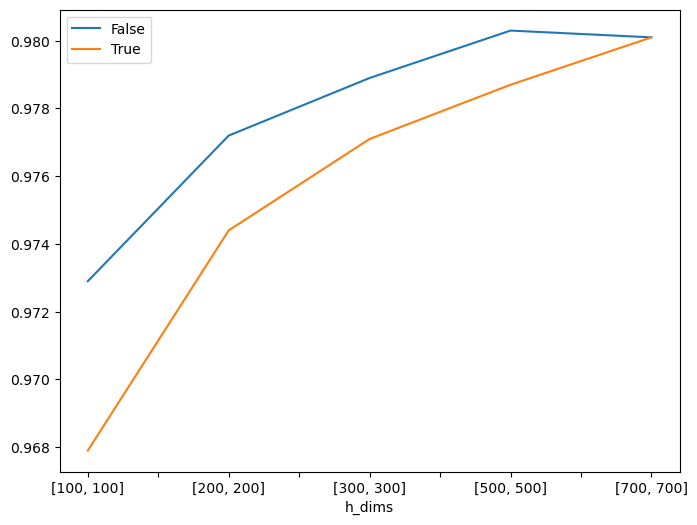

In [57]:
df = stats1.loc[2:11].sort_values(by='h_dims')
fig, ax = plt.subplots(figsize=(8,6))
for label, df in df.groupby(by='pretrain'):
    df.plot(x='h_dims', y='test_acc', ax=ax, label=label)
plt.legend()
plt.savefig('./img/width.png')

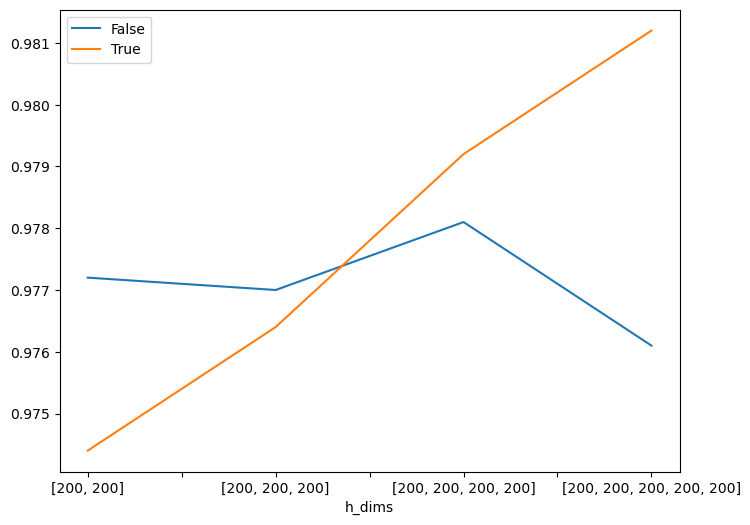

In [93]:
stats2 = stats[stats['data_size'] == 60000].loc[10:18] 
df = stats2
fig, ax = plt.subplots(figsize=(8,6))
for label, df in df.groupby(by='pretrain'):
    df.plot(x='h_dims', y='test_acc', ax=ax, label=label)
plt.legend()
plt.savefig('./img/depth.png')

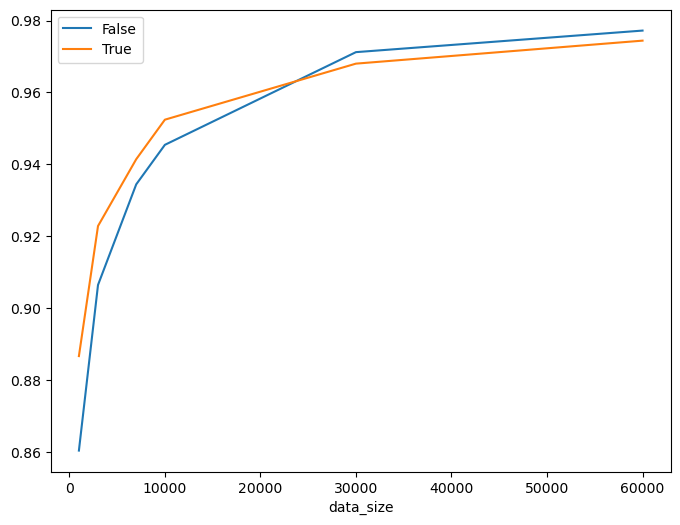

In [92]:
stats3 = stats[stats['h_dims'].apply(lambda x: x==[200,200])].sort_values('data_size')
df = stats3
fig, ax = plt.subplots(figsize=(8,6))
for label, df in df.groupby(by='pretrain'):
    df.plot(x='data_size', y='test_acc', ax=ax, label=label)
plt.legend()
plt.savefig('./img/data_size.png')

In [95]:
df = pd.read_csv('./lightning_logs/version_25/metrics.csv')

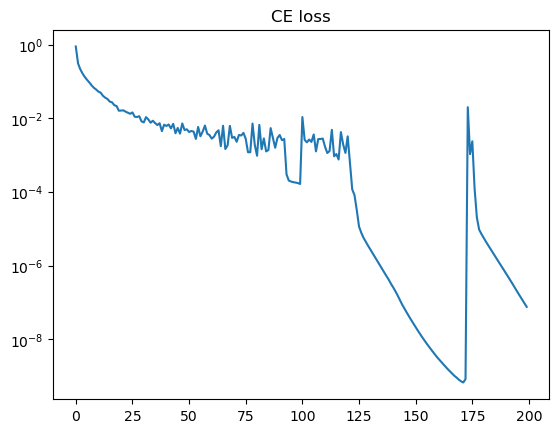

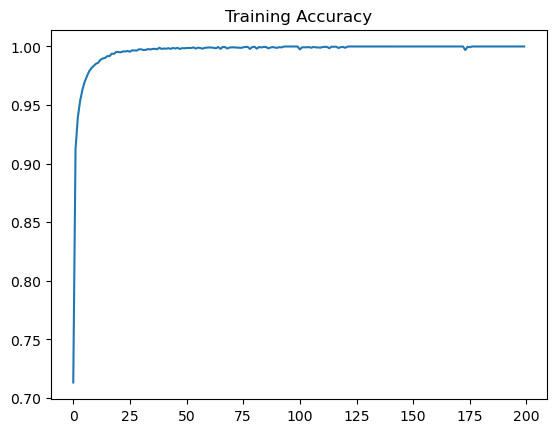

In [100]:
plt.figure()
plt.yscale('log')
plt.title('CE loss')
df['train_loss'].plot()
plt.savefig('./img/CE Loss.png')
plt.figure()
plt.title('Training Accuracy')
df['train_acc'].plot()
plt.savefig('./img/Training Accuracy.png')